In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('portfolio_data.csv')
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [6]:
stock_data = df[["Date","NFLX"]]

In [7]:
stock_data

,Date,NFLX
0,5/1/2013,30.415714
1,5/2/2013,30.641428
2,5/3/2013,30.492857
3,5/6/2013,30.098572
4,5/7/2013,29.464285
...,...,...
1515,5/8/2019,364.369995
1516,5/9/2019,362.750000
1517,5/10/2019,361.040009
1518,5/13/2019,345.260010


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   NFLX    1520 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.9+ KB


In [10]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1520 non-null   datetime64[ns]
 1   NFLX    1520 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.9 KB


In [13]:
stock_data = stock_data.set_index("Date")

In [14]:
stock_data

,NFLX
Date,
2013-05-01,30.415714
2013-05-02,30.641428
2013-05-03,30.492857
2013-05-06,30.098572
2013-05-07,29.464285
...,...
2019-05-08,364.369995
2019-05-09,362.750000
2019-05-10,361.040009


In [16]:
stock_data.describe()

,NFLX
count,1520.000000
mean,147.668273
std,107.641486
min,29.464285
25%,62.851071
50%,104.000000
75%,192.207496
max,418.970001


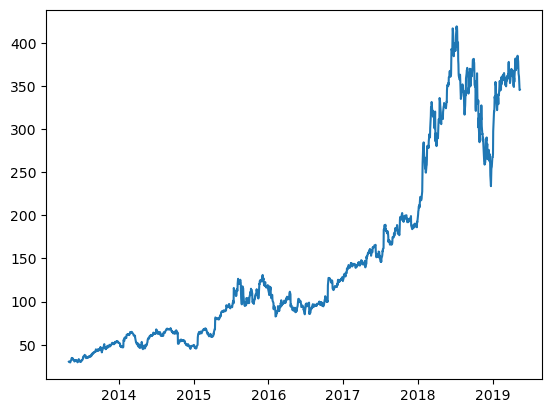

In [17]:
plt.plot(stock_data.NFLX)

(array([484., 300., 216., 112.,  78.,  18.,  63.,  86., 137.,  26.]),
 array([ 29.464285 ,  68.4148566, 107.3654282, 146.3159998, 185.2665714,
        224.217143 , 263.1677146, 302.1182862, 341.0688578, 380.0194294,
        418.970001 ]),
 <BarContainer object of 10 artists>)

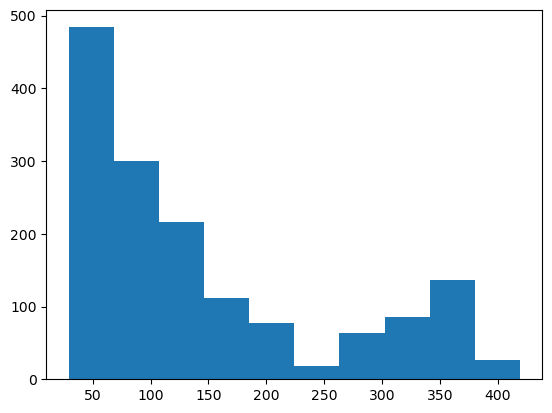

In [18]:
plt.hist(stock_data.NFLX)

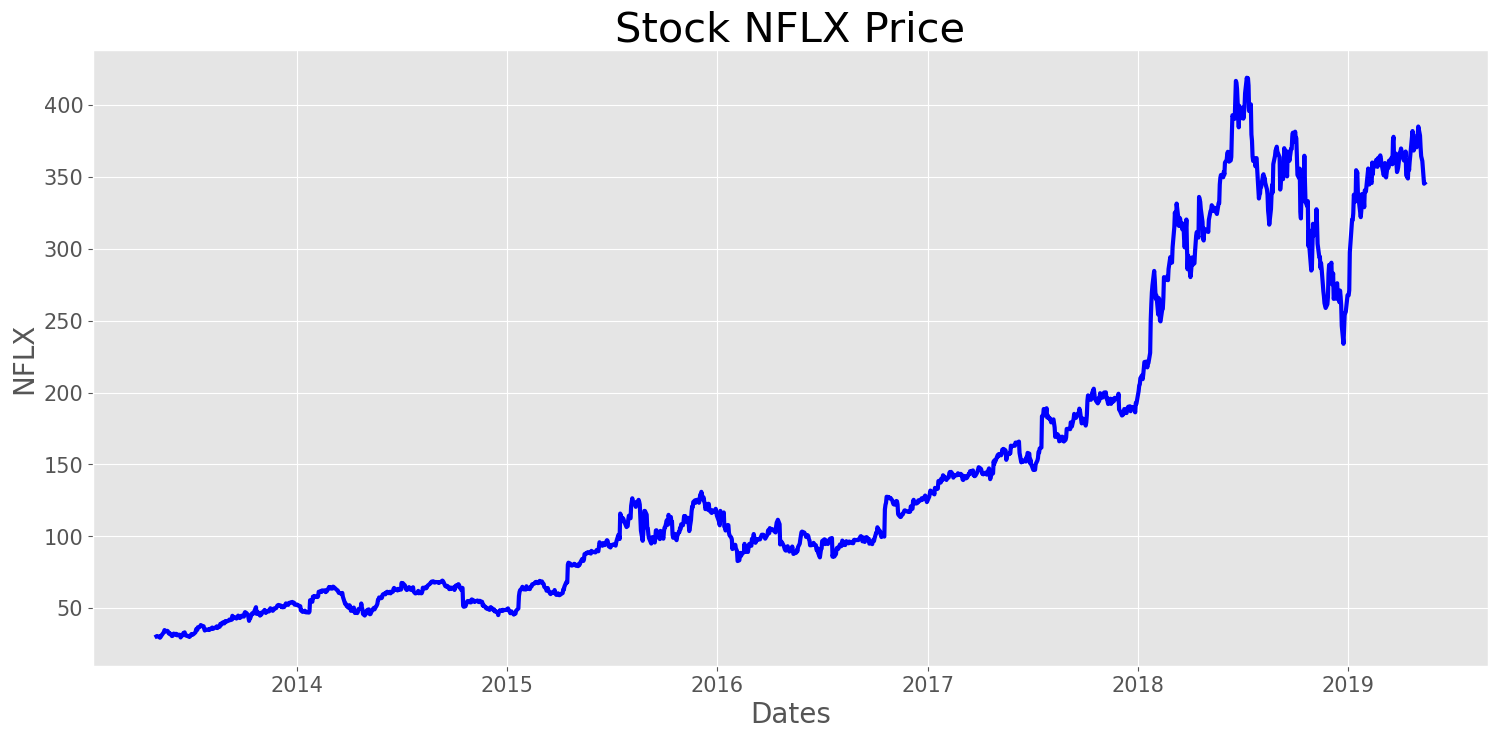

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('NFLX', fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['NFLX'], linewidth=3, color='blue')
plt.title('Stock NFLX Price', fontsize=30)
plt.show()

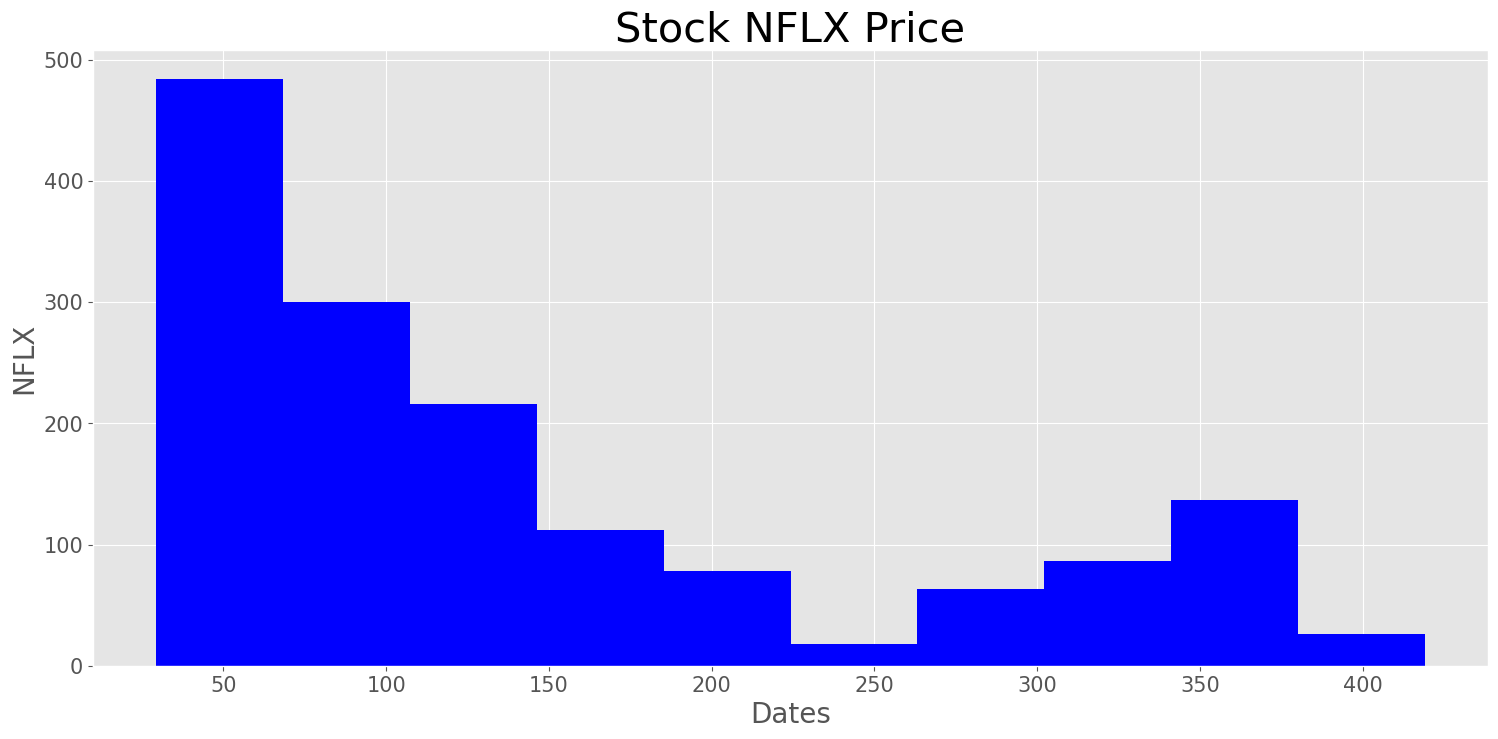

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('NFLX', fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['NFLX'], linewidth=3, color='blue')
plt.title('Stock NFLX Price', fontsize=30)
plt.show()

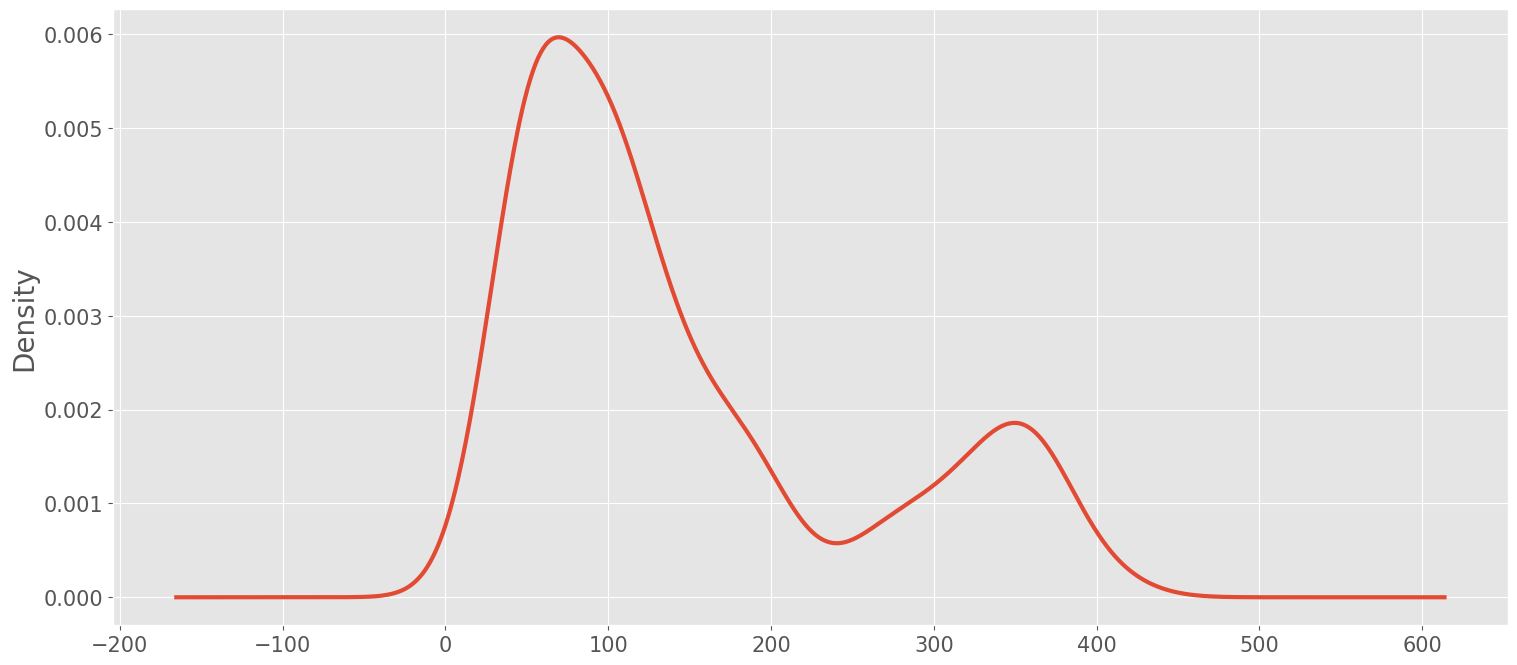

In [21]:
df_nflx = stock_data['NFLX']
df_nflx.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid('both')
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [32]:
rolmean=stock_data['NFLX'].rolling(48).mean()

In [33]:
rolstd=stock_data['NFLX'].rolling(48).std()

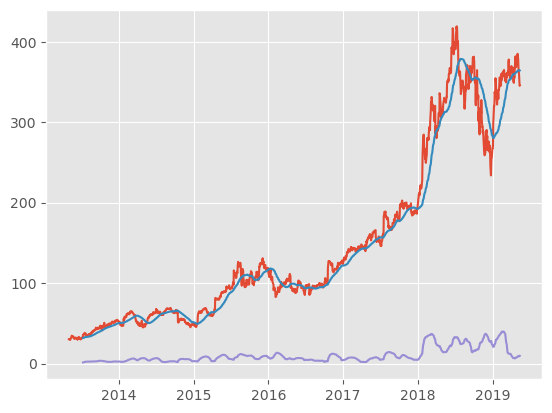

In [34]:
plt.plot(stock_data.NFLX)
plt.plot(rolmean)
plt.plot(rolstd)

In [35]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["NFLX"])

In [39]:
pd.Series(adft[0:4],index=["test stats", "p-value", "lag", "data points"])

test stats       -0.184158
p-value           0.940384
lag              22.000000
data points    1497.000000
dtype: float64

In [40]:
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

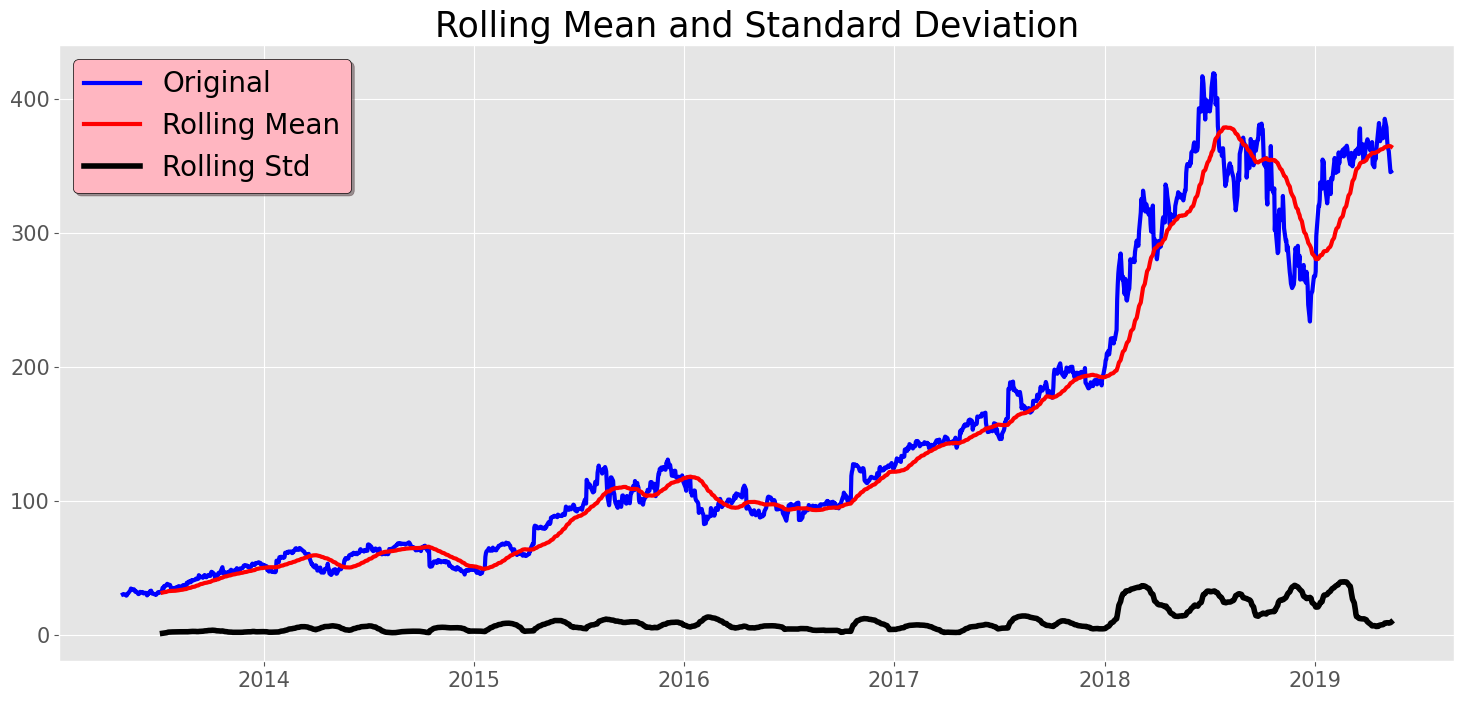

Results of dickey fuller test
Test Statistics                  -0.184158
p-value                           0.940384
No. of lags used                 22.000000
Number of observations used    1497.000000
critical value (1%)              -3.434726
critical value (5%)              -2.863473
critical value (10%)             -2.567799
dtype: float64


In [41]:
test_stationarity(stock_data.NFLX)

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["NFLX"]],period=12)

In [43]:
result.seasonal

Date
2013-05-01    0.226737
2013-05-02   -0.123280
2013-05-03   -0.208281
2013-05-06   -0.376622
2013-05-07   -0.229890
                ...   
2019-05-08   -0.376622
2019-05-09   -0.229890
2019-05-10   -0.354311
2019-05-13   -0.572134
2019-05-14    0.050522
Name: seasonal, Length: 1520, dtype: float64

<Figure size 2000x1000 with 0 Axes>

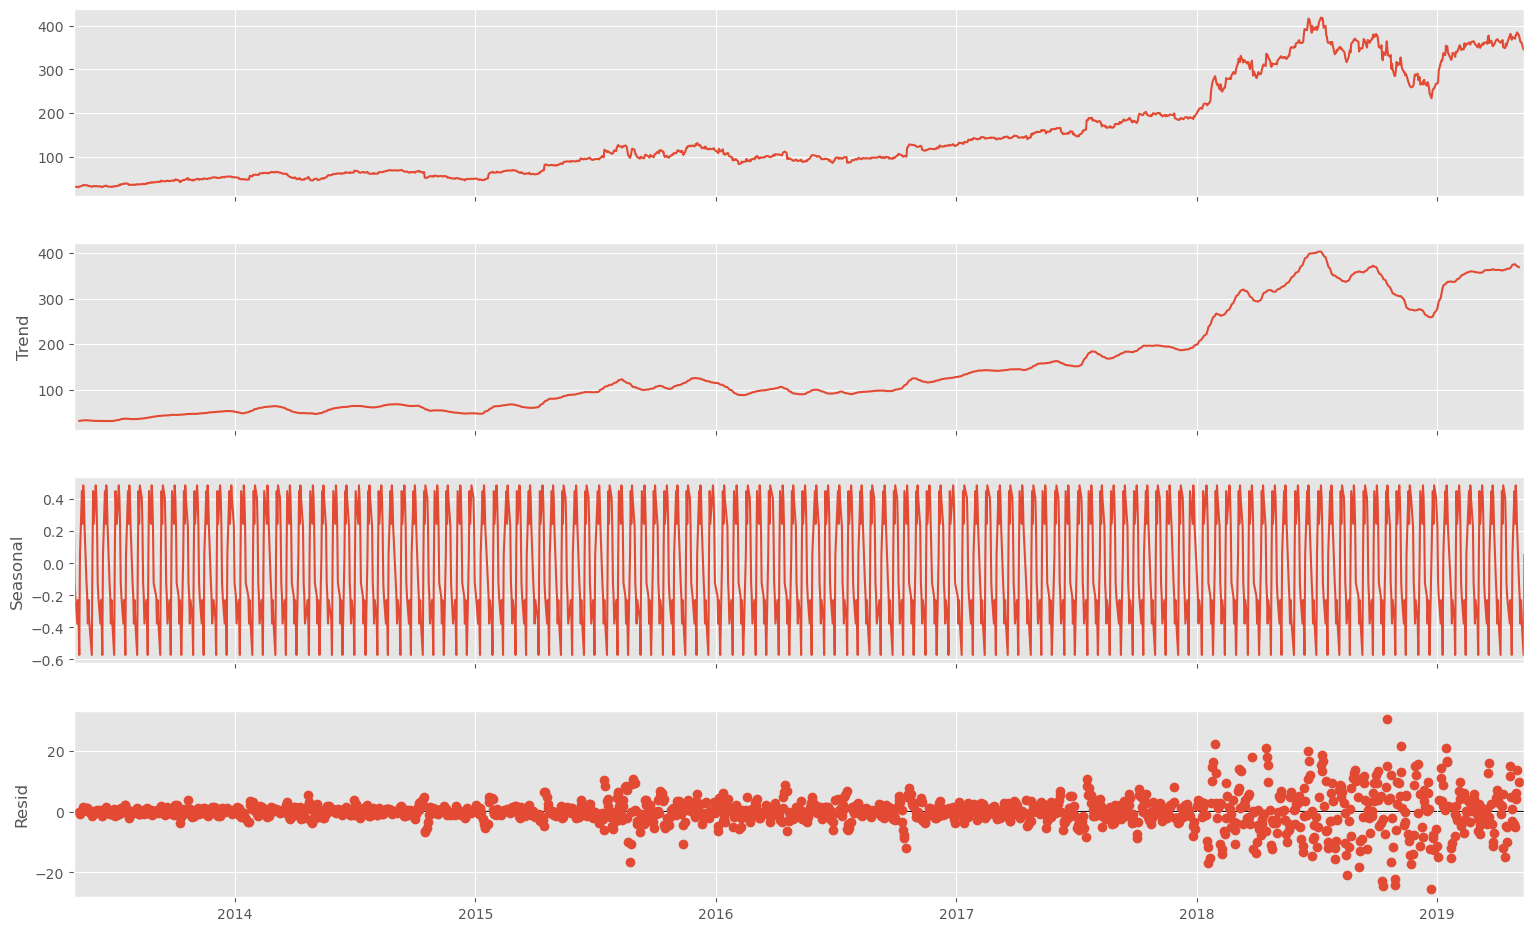

In [44]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["NFLX"]],period=12,model="multiplicative")

<Figure size 2000x1000 with 0 Axes>

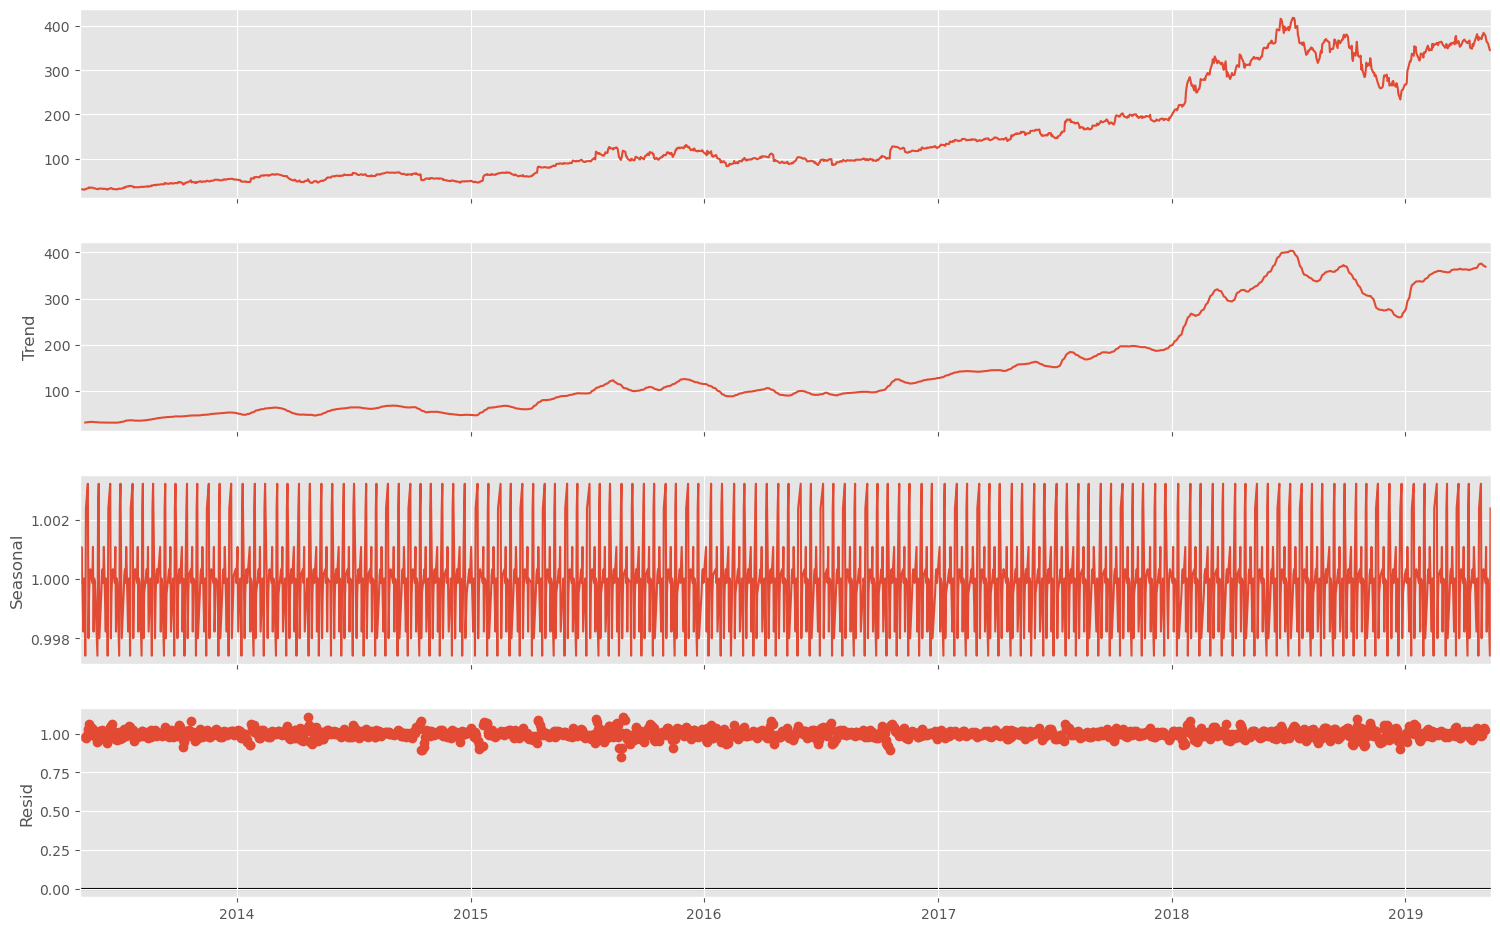

In [46]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: >

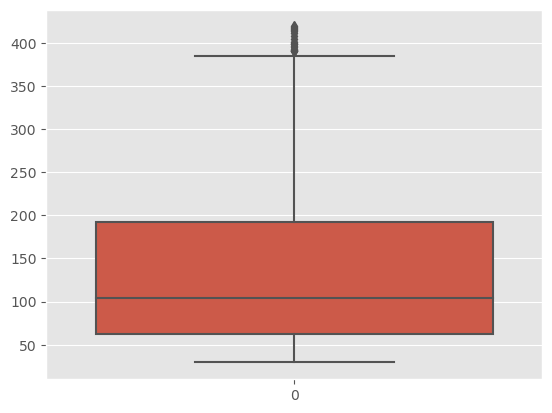

In [48]:
sns.boxplot(stock_data.NFLX)

In [49]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

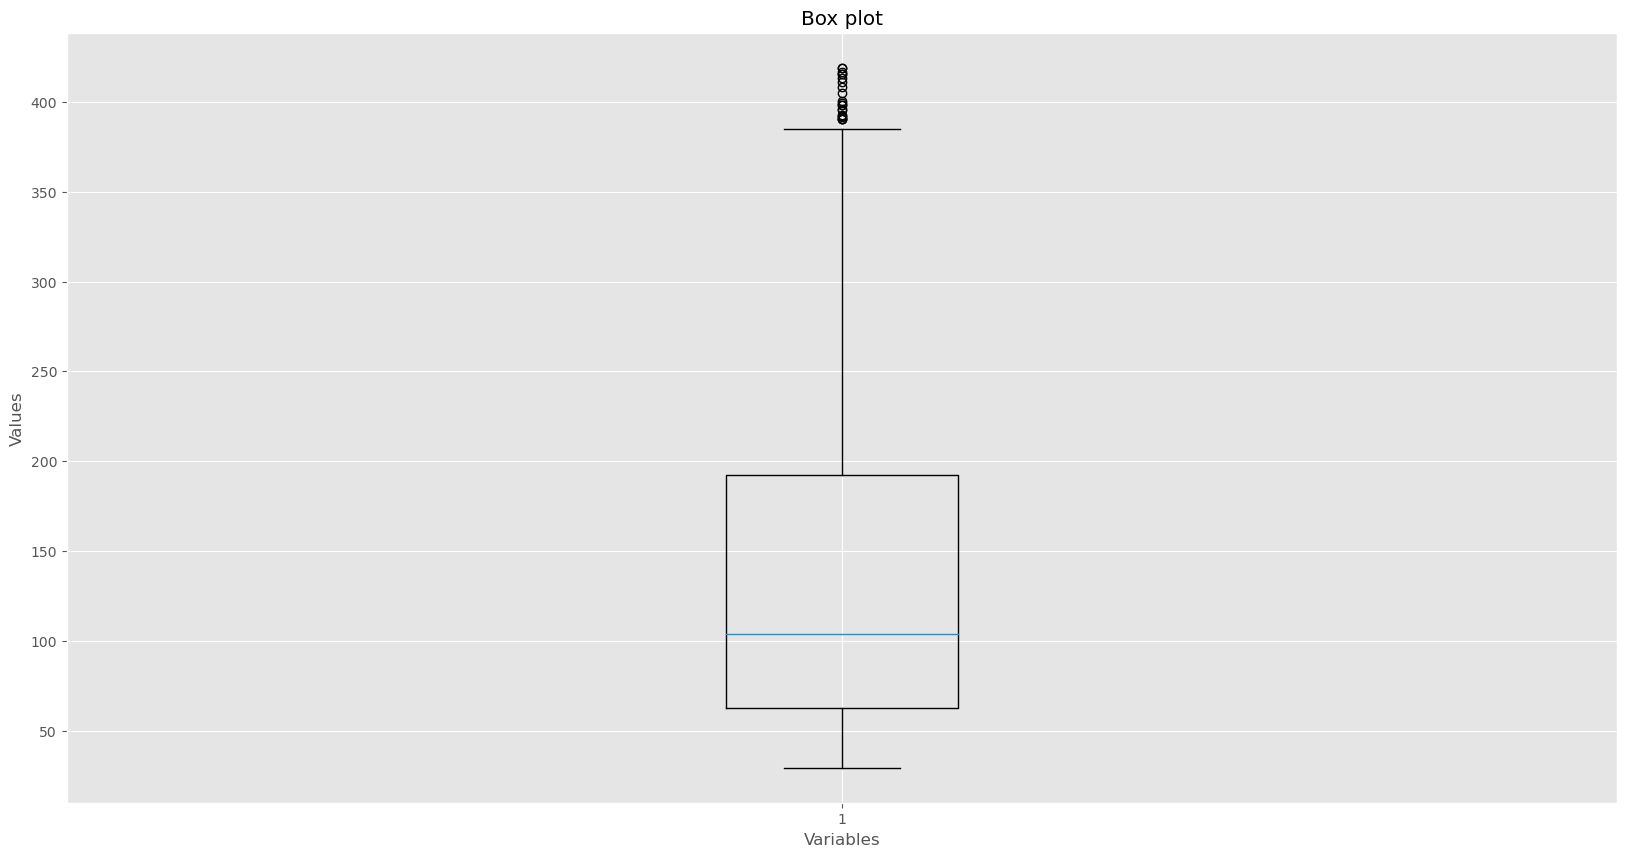

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(stock_data["NFLX"])
ax.set_xlabel("Variables")
ax.set_ylabel("Values")
ax.set_title("Box plot")
plt.show()

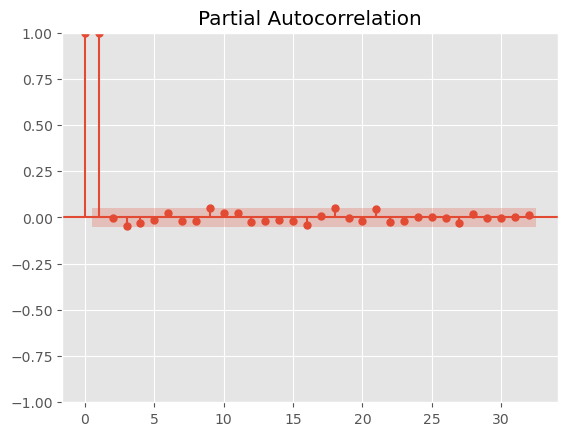

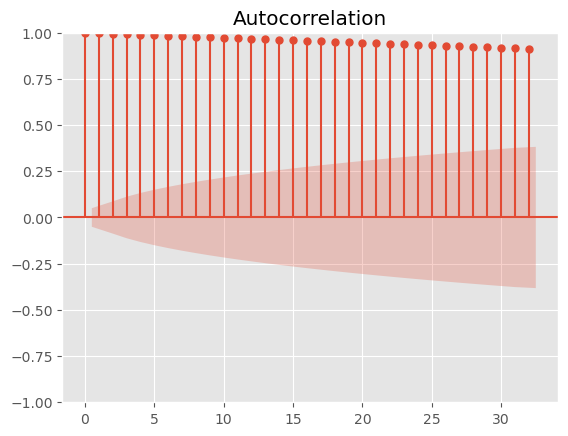

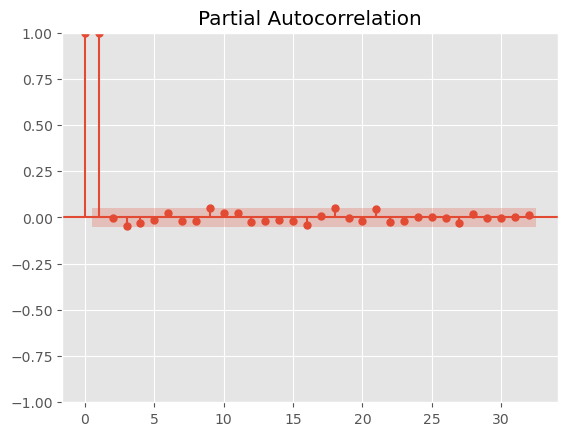

In [52]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.NFLX)
plot_pacf(stock_data.NFLX)

In [53]:
df_nflx=stock_data["NFLX"]

In [57]:
df_nflx=df_nflx.diff()
df_nflx=df_nflx.dropna()

In [58]:
df_nflx

Date
2013-05-06     0.128571
2013-05-07     0.005712
2013-05-08     1.211432
2013-05-09    -0.194287
2013-05-10    -1.708571
                ...    
2019-05-08     3.970062
2019-05-09     2.349975
2019-05-10    -4.559997
2019-05-13   -13.980012
2019-05-14    30.199982
Name: NFLX, Length: 1517, dtype: float64

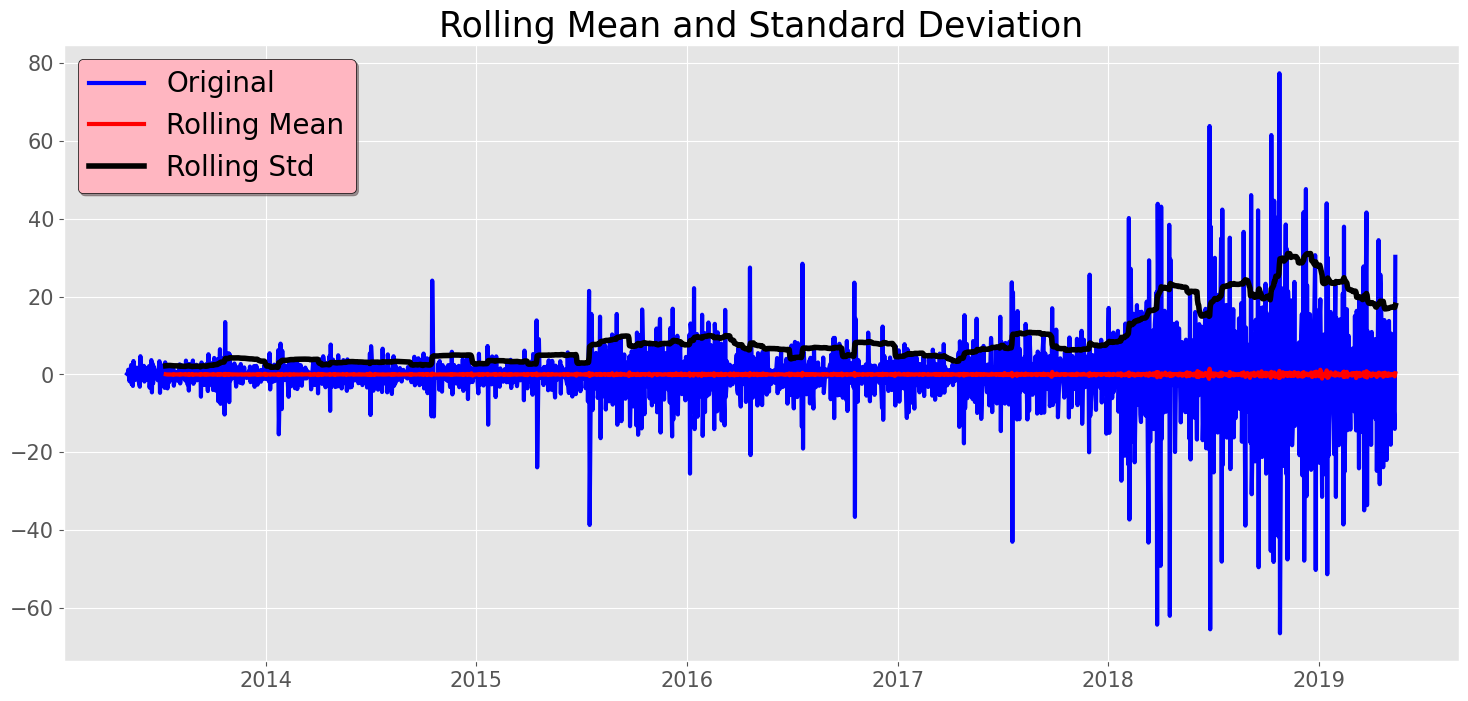

Results of dickey fuller test
Test Statistics               -1.794320e+01
p-value                        2.855849e-30
No. of lags used               2.400000e+01
Number of observations used    1.492000e+03
critical value (1%)           -3.434740e+00
critical value (5%)           -2.863479e+00
critical value (10%)          -2.567802e+00
dtype: float64


In [59]:
test_stationarity(df_nflx)

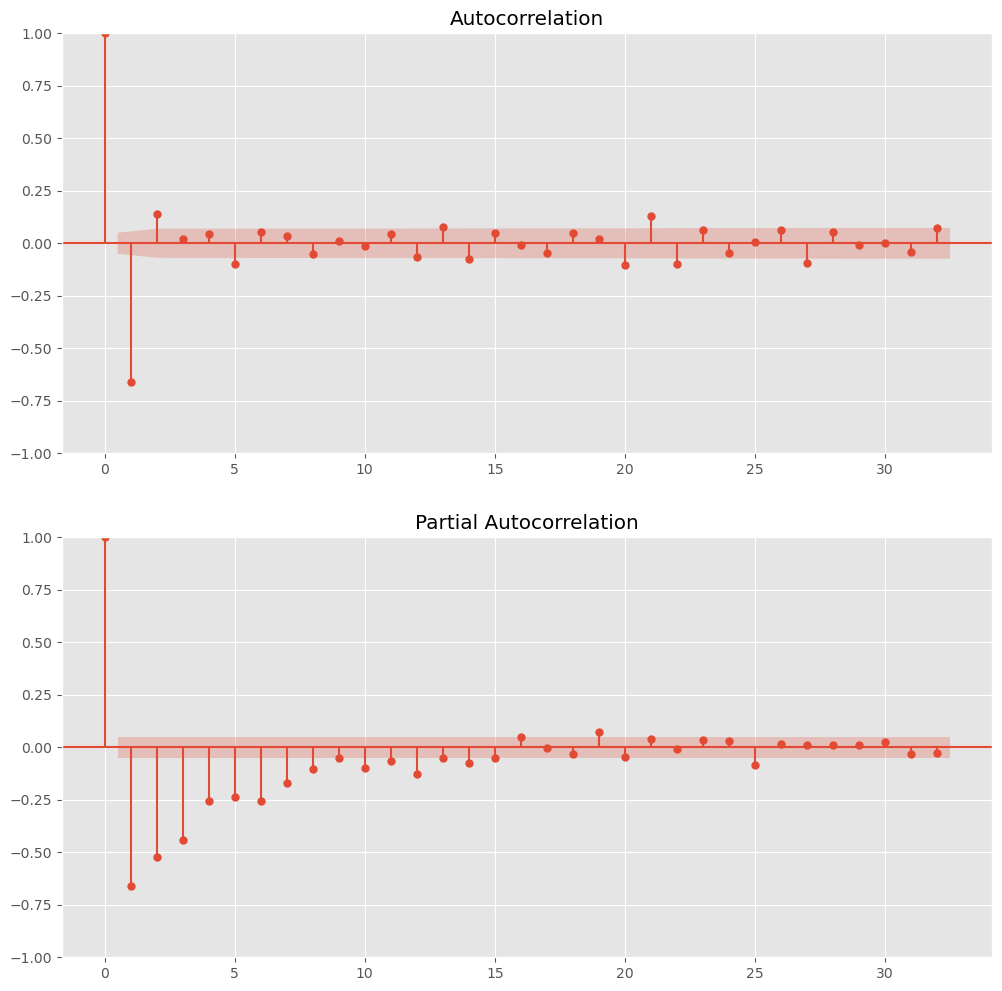

In [61]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_nflx, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_nflx, ax=ax2)

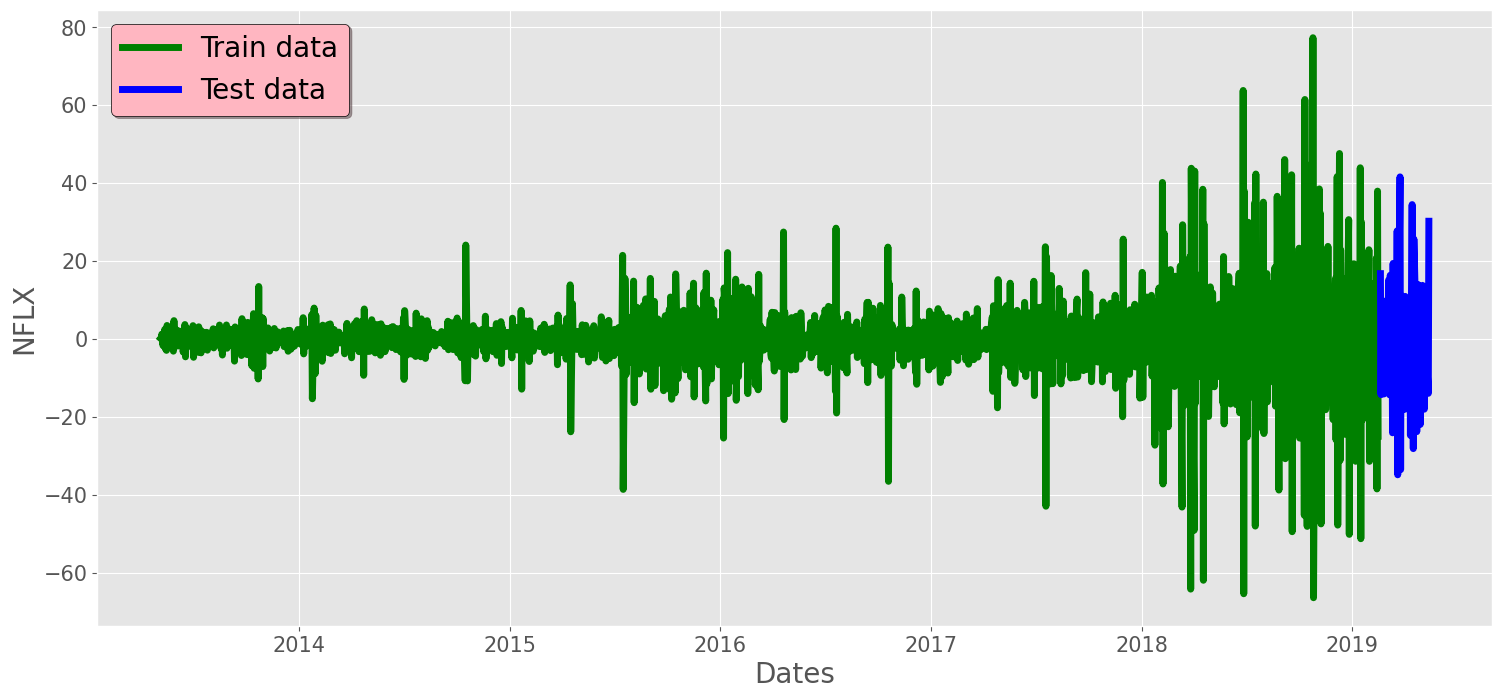

In [62]:
train_data=df_nflx[0:-60]
test_data=df_nflx[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("NFLX", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, 'green', label='Train data', linewidth=5)
plt.plot(test_data, 'blue', label='Test data', linewidth=5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

In [63]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
history=[x for x in train_data]

In [65]:
model=ARIMA(history,order=(1,1,1))

In [66]:
model=model.fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1457
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5166.807
Date:                Thu, 18 Apr 2024   AIC                          10339.614
Time:                        19:45:07   BIC                          10355.465
Sample:                             0   HQIC                         10345.528
                               - 1457                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6694      0.011    -60.191      0.000      -0.691      -0.648
ma.L1         -0.9999      0.256     -3.902      0.000      -1.502      -0.498
sigma2        70.3495     18.060      3.895      0.000      34.952     105.747
===================================================================================
Ljung-Box (L1) (Q):                 173.36   Jarque-Bera (JB):              5228.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              29.64   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
model.forecast()[0]

16.734816662664613

In [69]:
test_data[0]

16.75005999999985

In [70]:
mean_squared_error([test_data[0]],model.forecast())

0.00023235933311577527

In [71]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

0.015243337335235196

In [72]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse